In [1]:
import pandas as pd
import numpy as np

In [2]:
symbol_dict = {'10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity':'T10Y3M',
               '10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity':'T10Y2Y',
               '3-Month Treasury Constant Maturity Minus Federal Funds Rate':'T3MFF',
               '6-Month Treasury Constant Maturity Minus Federal Funds Rate':'T6MFF',
               '1-Year Treasury Constant Maturity Minus Federal Funds Rate':'T1YFF',
               '10-Year Treasury Constant Maturity Minus Federal Funds Rate':'T10YFF',
               '3-Month Commercial Paper Minus Federal Funds Rate':'CPFF',
               'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis':'DGS10',
               'Market Yield on U.S. Treasury Securities at 1-Month Constant Maturity, Quoted on an Investment Basis':'DGS1MO',
               'Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis':'DGS20',
               'Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity, Quoted on an Investment Basis':'DGS30',
               'Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis':'DGS2',
               'Market Yield on U.S. Treasury Securities at 3-Month Constant Maturity, Quoted on an Investment Basis':'DGS3MO',
               'Market Yield on U.S. Treasury Securities at 6-Month Constant Maturity, Quoted on an Investment Basis':'DGS6MO',
               'Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis':'DGS5',
               'Market Yield on U.S. Treasury Securities at 7-Year Constant Maturity, Quoted on an Investment Basis':'DGS7',
               'Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis':'DGS1',
              }

In [3]:
df = pd.DataFrame()

In [4]:
for i,j in symbol_dict.items():
    output = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id='+j)
    output = output.melt(id_vars = ['DATE'], var_name = 'Variable' , value_name = 'Value')
    output['Variable Description'] = i
    df = pd.concat([df,output])

In [5]:
df = df[df['Value'] !='.']

In [6]:
df.dtypes

DATE                    object
Variable                object
Value                   object
Variable Description    object
dtype: object

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Value'] = pd.to_numeric(df['Value'])

In [8]:
df.dtypes

DATE                    datetime64[ns]
Variable                        object
Value                          float64
Variable Description            object
dtype: object

In [9]:
df = df.set_index('DATE')


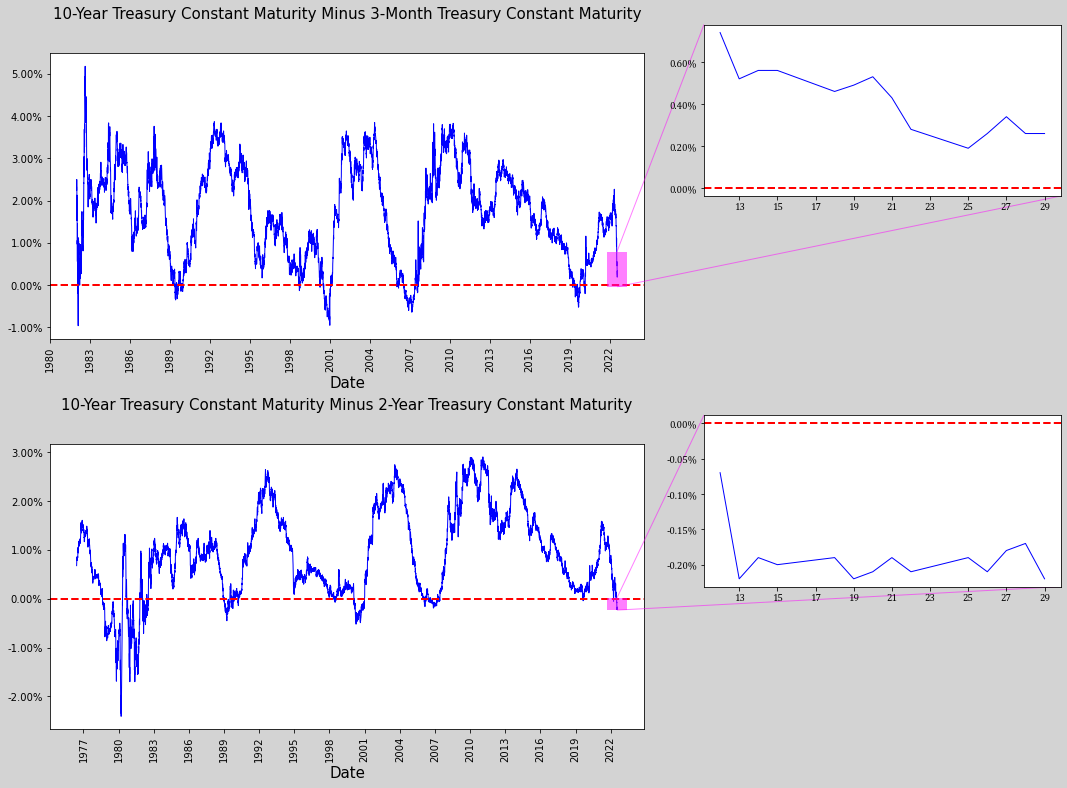

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

from datetime import datetime

unique_variable = list(df["Variable Description"].unique())[0:2]


fig, axs = plt.subplots(nrows= math.ceil(len(unique_variable)/1), ncols=1,figsize = (20,11) ,facecolor= 'lightgray')

plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"


ax = axs.ravel()


for symbol, i in zip(unique_variable, range(0,len(unique_variable))):
    y = df[df["Variable Description"] == symbol]['Value']
    y2 = df[(df["Variable Description"] == symbol) & (df.index >= datetime.now()-pd.to_timedelta("20day"))]['Value']
        
    ax[i].plot(y,color = 'blue' , linewidth = 1)
    ax[i].axhline(y = 0 , color = 'red' , linewidth = 2 , linestyle = '--')
    ax[i].set_title(symbol, fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[i].xaxis.set_major_locator(mdates.YearLocator(3)) 
    ax[i].yaxis.set_major_formatter('{x:1.2f}%')
    ax[i].tick_params(axis='x', rotation=90)
    
    axins = ax[i].inset_axes([1.1,0.5,0.6,0.6])
    axins.plot(y2,color = 'blue' , linewidth = 1)
    axins.axhline(y = 0 , color = 'red' , linewidth = 2 , linestyle = '--')
    axins.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    axins.yaxis.set_major_formatter('{x:1.2f}%')
    
    ax[i].indicate_inset_zoom(axins, edgecolor='magenta',linewidth = 20)
    
fig.tight_layout()

In [11]:
yield_curve_dict = {'DGS1MO':1/12,'DGS3MO':3/12,'DGS6MO':6/12,'DGS1':1,'DGS2':2,'DGS5':5,'DGS7':7,'DGS10':10,'DGS20':20,'DGS30':30}  

df_yield_curve =df.copy()
df_yield_curve['rank'] = df['Variable'].map(yield_curve_dict)


yield_curve_dict.keys()

df_yield_curve = df_yield_curve[(df_yield_curve.index >=datetime(2022,1,1)) & (df_yield_curve['Variable'].isin(yield_curve_dict.keys()))].sort_values(by = ['rank'])

df_yield_curve_pivot = df_yield_curve.pivot(columns = ['rank'],values = 'Value').sort_index(axis='columns', level='rank')
#df_yield_curve_pivot = df_yield_curve.pivot(columns = ['Variable'],values = 'Value').sort_index(axis='columns', level='rank')

df_yield_curve_pivot

rank,0.083333,0.250000,0.500000,1.000000,2.000000,5.000000,7.000000,10.000000,20.000000,30.000000
DATE,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...
2022-07-22,2.15,2.49,2.97,3.01,2.98,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.62,3.06,3.07,3.00,2.89,2.89,2.81,3.28,3.04
2022-07-26,2.17,2.55,3.01,3.06,3.02,2.89,2.88,2.81,3.27,3.03


In [12]:
df_yield_curve_pivot.rename(columns={ df_yield_curve_pivot.columns[0]: "1M" ,df_yield_curve_pivot.columns[1]: "3M",
                                    df_yield_curve_pivot.columns[2]: "6M",df_yield_curve_pivot.columns[3]: "1Y",
                                    df_yield_curve_pivot.columns[4]: "2Y",df_yield_curve_pivot.columns[5]: "5Y",
                                    df_yield_curve_pivot.columns[6]: "7Y",df_yield_curve_pivot.columns[7]: "10Y",
                                    df_yield_curve_pivot.columns[8]: "20Y",df_yield_curve_pivot.columns[9]: "30Y"}
                            , inplace = True)

df_yield_curve_pivot

rank,1M,3M,6M,1Y,2Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...
2022-07-22,2.15,2.49,2.97,3.01,2.98,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.62,3.06,3.07,3.00,2.89,2.89,2.81,3.28,3.04
2022-07-26,2.17,2.55,3.01,3.06,3.02,2.89,2.88,2.81,3.27,3.03


<IPython.core.display.Javascript object>


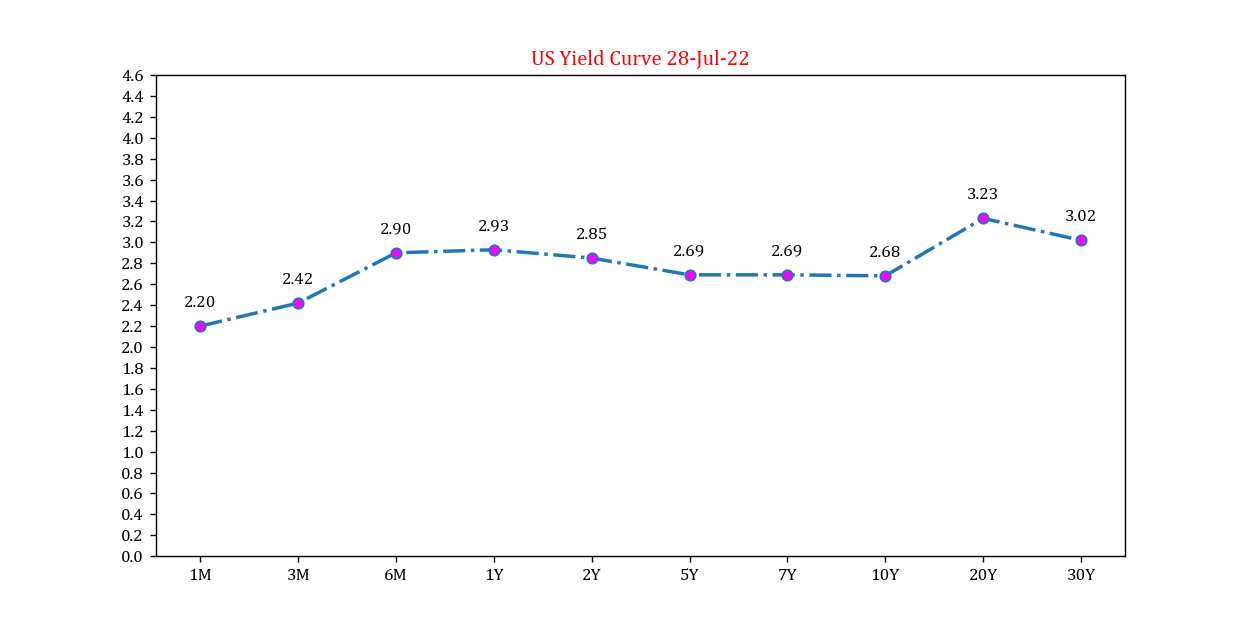

In [13]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation , PillowWriter
import numpy as np
from datetime import datetime
import numpy as np

unique_date = list(df_yield_curve_pivot.index)
    
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(1,1,1)



def animate(i):
    axes.clear()
    idx = pd.IndexSlice
    label  = unique_date[i].strftime("%d-%b-%y")
    x = df_yield_curve_pivot.columns.values
    y = df_yield_curve_pivot.loc[idx[unique_date[i],:]].values
    axes.plot(x,y, linestyle='dashdot' ,linewidth = 2 ,marker='o' ,markerfacecolor='magenta')
    #axes.set_ylim([0,df_yield_curve_pivot.values.max()])
    axes.set_yticks(np.arange(0,df_yield_curve_pivot.values.max() +1,0.2))
    #axe.set_xticklabels(['1M','3M','6M','1Y','2Y','5Y','10Y','20Y','30Y'])s
    #plt.legend([label] , loc = 'lower right',labelcolor='red')
    plt.title('US Yield Curve' + ' ' + label , color = 'red' )
    
    for i,j in zip (x,y):
        marking = "{:.2f}".format(j)
        plt.annotate(marking,(i,j), xytext=(0, 11), textcoords='offset points',ha = 'center')


anim = FuncAnimation(fig,animate,frames=len(unique_date),interval=500 ,repeat = False)
#anim.save(r'C:\Users\DX321VW\OneDrive - EY\Documents\Python Scripts\YieldCurve.mp4',writer="ffmpeg")
 
plt.show()


In [14]:
f = r"C://Users/DX321VW/OneDrive - EY/Documents/Python Scripts/animation.gif" 
writergif = PillowWriter(fps=2) 
anim.save(f, writer=writergif)
